### 1. Data Source

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import psycopg2
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Define the connection parameters

dbname = 'XXXX'
user = 'XXXX' # Confidentials blurred after extraction
password = 'XXXX'
host = 'XXXXX'
port = 'XXXX'

In [114]:
# create a connection
connection = psycopg2.connect(
    dbname = dbname,
    user = user,
    password = password,
    host = host,
    port = port
)

In [115]:
cursor = connection.cursor()
cursor.execute("SELECT * FROM mlds422.movies")
result = cursor.fetchall()

In [116]:
# Transform the result into a dataframe
movies = pd.DataFrame(result)
movies.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,2057-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127.0,89,27,74.0,68860.0


In [117]:
# Add column names according to schema
movies.columns = ['movie_id', 'movie_title', 'movie_info', 'rating', 'genre', 'directors', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes',
                   'critic_rating', 'critic_count', 'audience_rating', 'audience_count']

In [118]:
movies.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",None,"Classics, Drama",Sidney Lumet,2057-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127.0,89,27,74.0,68860.0


In [119]:
# Save the dataframe to csv file so that no need to visit the database again next time
movies.to_csv('movies.csv', index = False)

### 2. EDA

In [3]:
# Reset movies by reading the csv file
movies = pd.read_csv('movies.csv')

In [4]:
movies.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
0,1,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,2010-02-12,2010-06-29,83.0,49,144,53.0,254287.0
1,2,Please Give,Kate has a lot on her mind. There's the ethics...,R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90.0,86,140,64.0,11567.0
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68,22,53.0,14670.0
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NaN,"Classics, Drama",Sidney Lumet,2057-04-13,2001-03-06,95.0,100,51,97.0,105000.0
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127.0,89,27,74.0,68860.0


In [5]:
movies.describe()

,movie_id,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
count,16638.000000,16483.000000,16638.000000,16638.000000,16381.000000,1.638600e+04
mean,8319.500000,102.391494,60.466522,56.607104,60.544228,1.524797e+05
std,4803.121225,25.028011,28.587230,66.383800,20.677356,1.817736e+06
min,1.000000,1.000000,0.000000,5.000000,4.000000,5.000000e+00
25%,4160.250000,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,8319.500000,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,12478.750000,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,16638.000000,2000.000000,100.000000,497.000000,200.000000,3.579764e+07


In [6]:
movies.dtypes

movie_id                int64
movie_title            object
movie_info             object
rating                 object
genre                  object
directors              object
in_theaters_date       object
on_streaming_date      object
runtime_in_minutes    float64
critic_rating           int64
critic_count            int64
audience_rating       float64
audience_count        float64
dtype: object

#### 2.1 Find the number of movies that were released in theatres each year

In [7]:
# Convert 'in_theaters_date' column to datetime64 format
movies['in_theaters_date'] = pd.to_datetime(movies['in_theaters_date'])

movies['in_theaters_date'].describe()

count                            15823
mean     2009-09-16 19:09:19.464070912
min                1970-01-01 00:00:00
25%                2000-01-09 12:00:00
50%                2009-05-26 00:00:00
75%                2015-09-04 00:00:00
max                2069-12-31 00:00:00
Name: in_theaters_date, dtype: object

Rows with year in the future should be dropped

In [8]:
# Drop all rows after 2024, because we are not sure about the collection date of the dataset
movies = movies[movies['in_theaters_date'] <= pd.to_datetime('2024-01-01')]

movies['in_theaters_date'].describe()

count                            14281
mean     2004-12-17 16:09:42.816329472
min                1970-01-01 00:00:00
25%                1998-10-02 00:00:00
50%                2007-12-05 00:00:00
75%                2014-01-24 00:00:00
max                2024-01-01 00:00:00
Name: in_theaters_date, dtype: object

In [9]:
# Convert 'in_theaters_date' column to datetime64 format
movies['in_theaters_date'] = pd.to_datetime(movies['in_theaters_date'])

# Extract the year from date column
movies['in_theaters_year'] = movies['in_theaters_date'].dt.year

In [10]:
movies.in_theaters_year.describe()

count    14281.000000
mean      2004.464463
std         11.706059
min       1970.000000
25%       1998.000000
50%       2007.000000
75%       2014.000000
max       2024.000000
Name: in_theaters_year, dtype: float64

In [11]:
# Group movies by year and calculate the count of movies each year
year_cnt = movies.groupby('in_theaters_year').count().iloc[:, 0: 1].reset_index()
year_cnt.columns = ['year', 'count_movies']
year_cnt.head()

,year,count_movies
0,1970,62
1,1971,67
2,1972,70
3,1973,81
4,1974,63


Text(0.5, 1.0, 'Count of movies per year')

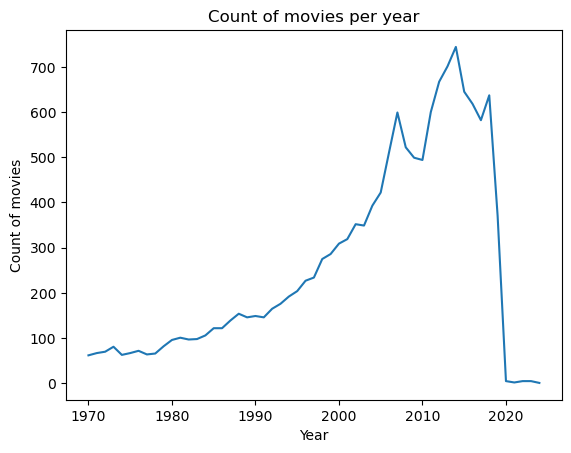

In [12]:
plt.plot(year_cnt.year, year_cnt.count_movies)
plt.xlabel('Year')
plt.ylabel('Count of movies')
plt.title('Count of movies per year')

Accordint to the plot, there is a tremendous decline in movie count since around 2015. This finding is not seemingly possible because the number of movies released has been increasing steadily.

Certain old movies have had their release dates incorrectly updated to reflect a century later than their actual debut. This occurs because some databases or systems record years using a two-digit format (e.g., "00" for 1900). When these systems are later interpreted or modernized, the century may default to 2000 instead of 1900. Consequently, a movie originally released in 1923 could erroneously be listed as being from 2023. Therefore in later train-test split we fill fix this error by subtracting 100 from movies released after 2020.

#### 2.2 When only looking at movies before 2010

In [13]:
movies = movies[movies['in_theaters_date'] <= pd.to_datetime('2010-01-01')]

In [14]:
# Sort by critic_rating
movies.sort_values('critic_rating', ascending = False).head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count,in_theaters_year
13604,13574,That's Entertainment,"It's ironic that MGM, in such dire financial s...",G,"Classics, Documentary, Musical & Performing Ar...","Jack Haley Jr., Jack Haley Jr.",1973-12-31,2004-10-12,132.0,100,13,85.0,5360.0,1973
14992,14974,The Trials of Darryl Hunt,"In 1984, a young white newspaper reporter, Deb...",PG-13,"Documentary, Special Interest","Ricki Stern, Anne Sundberg, Annie Sundberg",2007-06-15,2007-10-16,113.0,100,11,88.0,2203.0,2007
1371,1336,Conspiracy,"In January of 1942, 15 of Adolf Hitler's right...",R,"Drama, Television",Frank R. Pierson,2001-01-01,2002-03-26,96.0,100,6,86.0,3507.0,2001
14667,14646,The Order of Myths,The first Mardi Gras in America was celebrated...,NaN,"Documentary, Musical & Performing Arts, Specia...",Margaret Brown,2008-07-25,2009-01-13,97.0,100,32,70.0,709.0,2008
14703,14681,The Passion of Anna (En Passion),"Liv Ullmann plays the widowed, crippled Anna F...",R,"Art House & International, Drama",Ingmar Bergman,1970-05-28,2004-02-10,101.0,100,14,85.0,2461.0,1970


In [15]:
# Sort by audience_rating
movies.sort_values('audience_rating', ascending = False).head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count,in_theaters_year
1283,1289,La Ciudad (The City),This American film (in Spanish) focuses on Lat...,NaN,"Art House & International, Drama",David Riker,1998-09-13,2005-06-14,88.0,83,12,100.0,313.0,1998
1846,1801,Ice People,While the mainstream world rolls on indefinite...,NaN,"Documentary, Special Interest",Anne Aghion,2008-04-26,2009-11-10,77.0,89,9,100.0,37.0,2008
222,216,Prima Ballerina,In the grand tradition of the Ballet Russes co...,NaN,"Art House & International, Special Interest",Laurent Gentot,2009-01-16,2009-12-08,NaN,81,26,100.0,24.0,2009
3229,3197,Been Rich All My Life,This documentary follows the most unlikely tro...,NaN,"Documentary, Musical & Performing Arts, Specia...",Heather MacDonald,2006-07-21,2006-11-21,81.0,80,30,100.0,961.0,2006
12463,12436,The Shawshank Redemption,"In 1946, a banker named Andy Dufresne (Tim Rob...",R,Drama,Frank Darabont,1994-09-10,1998-01-27,142.0,90,71,98.0,885508.0,1994


By knowledge, those 10 movies ranked by either critics or audiences criteria are not considered popular in general.

#### 2.3 Create a new DataFrame containing only “popular” movies that were released in theatres before 2010

In [16]:
# Find the popular movies by averaging audience count
cutoff = np.mean(movies.audience_count)
# Novies has already been filtered by 2010
pop_movies = movies[movies.audience_count > cutoff]

In [17]:
pop_movies.sort_values('critic_rating', ascending = False).head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count,in_theaters_year
15439,15415,Toy Story,"Woody, a traditional pull-string talking cowbo...",G,"Animation, Comedy, Kids & Family",John Lasseter,1995-11-22,2001-03-20,80.0,100,88,92.0,1109209.0,1995
13557,13528,The Terminator,A Cyborg has been sent from the future on a de...,R,"Action & Adventure, Science Fiction & Fantasy",James Cameron,1984-10-26,1997-09-03,108.0,100,61,89.0,775856.0,1984
15440,15416,Toy Story 2,"Toy Story 2' is the exciting, all-new sequel t...",G,"Animation, Comedy, Kids & Family",John Lasseter,1999-11-24,2000-10-17,92.0,100,169,86.0,999952.0,1999
53,51,Aliens,"Big-budget special effects, swiftly paced acti...",R,"Action & Adventure, Horror, Science Fiction & ...",James Cameron,1986-07-18,1999-06-01,138.0,99,72,94.0,429158.0,1986
6139,6104,Finding Nemo,"In this stunning underwater adventure, with me...",G,"Animation, Comedy, Kids & Family","Andrew Stanton, Lee Unkrich",2003-05-30,2013-05-07,100.0,99,263,86.0,33356856.0,2003


In [18]:
pop_movies.sort_values('audience_rating', ascending = False).head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count,in_theaters_year
12463,12436,The Shawshank Redemption,"In 1946, a banker named Andy Dufresne (Tim Rob...",R,Drama,Frank Darabont,1994-09-10,1998-01-27,142.0,90,71,98.0,885508.0,1994
6747,6704,The Godfather,Popularly viewed as one of the best American f...,R,Drama,Francis Ford Coppola,1972-03-24,2001-10-09,175.0,98,91,98.0,732931.0,1972
6748,6705,"The Godfather, Part II",Francis Ford Coppola's legendary continuation ...,R,"Drama, Mystery & Suspense",Francis Ford Coppola,1974-12-20,2005-05-24,200.0,97,74,97.0,410868.0,1974
851,835,GoodFellas,Martin Scorsese explores the life of organized...,R,Drama,Martin Scorsese,1990-09-19,1997-03-26,146.0,96,95,97.0,428871.0,1990
5706,5676,Star Wars: Episode V - The Empire Strikes Back,The second entry in George Lucas' Star Wars tr...,PG,"Action & Adventure, Drama, Science Fiction & F...",Irvin Kershner,1980-06-20,2004-09-21,124.0,95,98,97.0,1055106.0,1980


Those top movies make more sense as they are all consdiered "good" by the public.

#### 2.4 Eploratory Questions

In [19]:
pop_movies['rating'].value_counts() / len(pop_movies['rating'])

rating
PG-13    0.436536
R        0.313167
PG       0.201661
G        0.048636
Name: count, dtype: float64

In conclusion, this distribution suggests that the dataset likely focuses on movies intended for older audiences, with a notable skew toward PG-13 and R ratings.

In [20]:
mean_by_rating = pop_movies[['rating', 'critic_rating', 'audience_rating']].groupby('rating').mean().reset_index()
mean_by_rating.head()

,rating,critic_rating,audience_rating
0,G,73.512195,73.195122
1,PG,59.652941,65.870588
2,PG-13,49.926630,63.086957
3,R,61.121212,70.821970


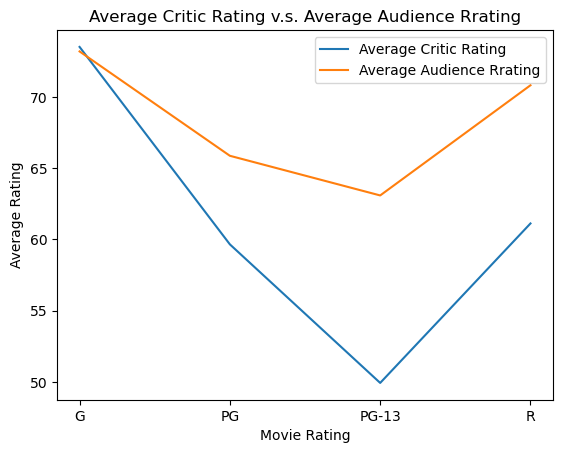

In [21]:
plt.plot(mean_by_rating.rating, mean_by_rating.critic_rating)
plt.plot(mean_by_rating.rating, mean_by_rating.audience_rating)
plt.title('Average Critic Rating v.s. Average Audience Rrating')
plt.legend(['Average Critic Rating', 'Average Audience Rrating'])
plt.xlabel('Movie Rating')
plt.ylabel('Average Rating')
plt.show()

According to the visualization, for all movie ratings, audience usually rate higher than the critics. Also, there are remarkable difference in average rating in different Movie Classifications(Rating).

#### 2.5 Pairplot

c:\Users\jacob\anaconda3\envs\ml_422\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


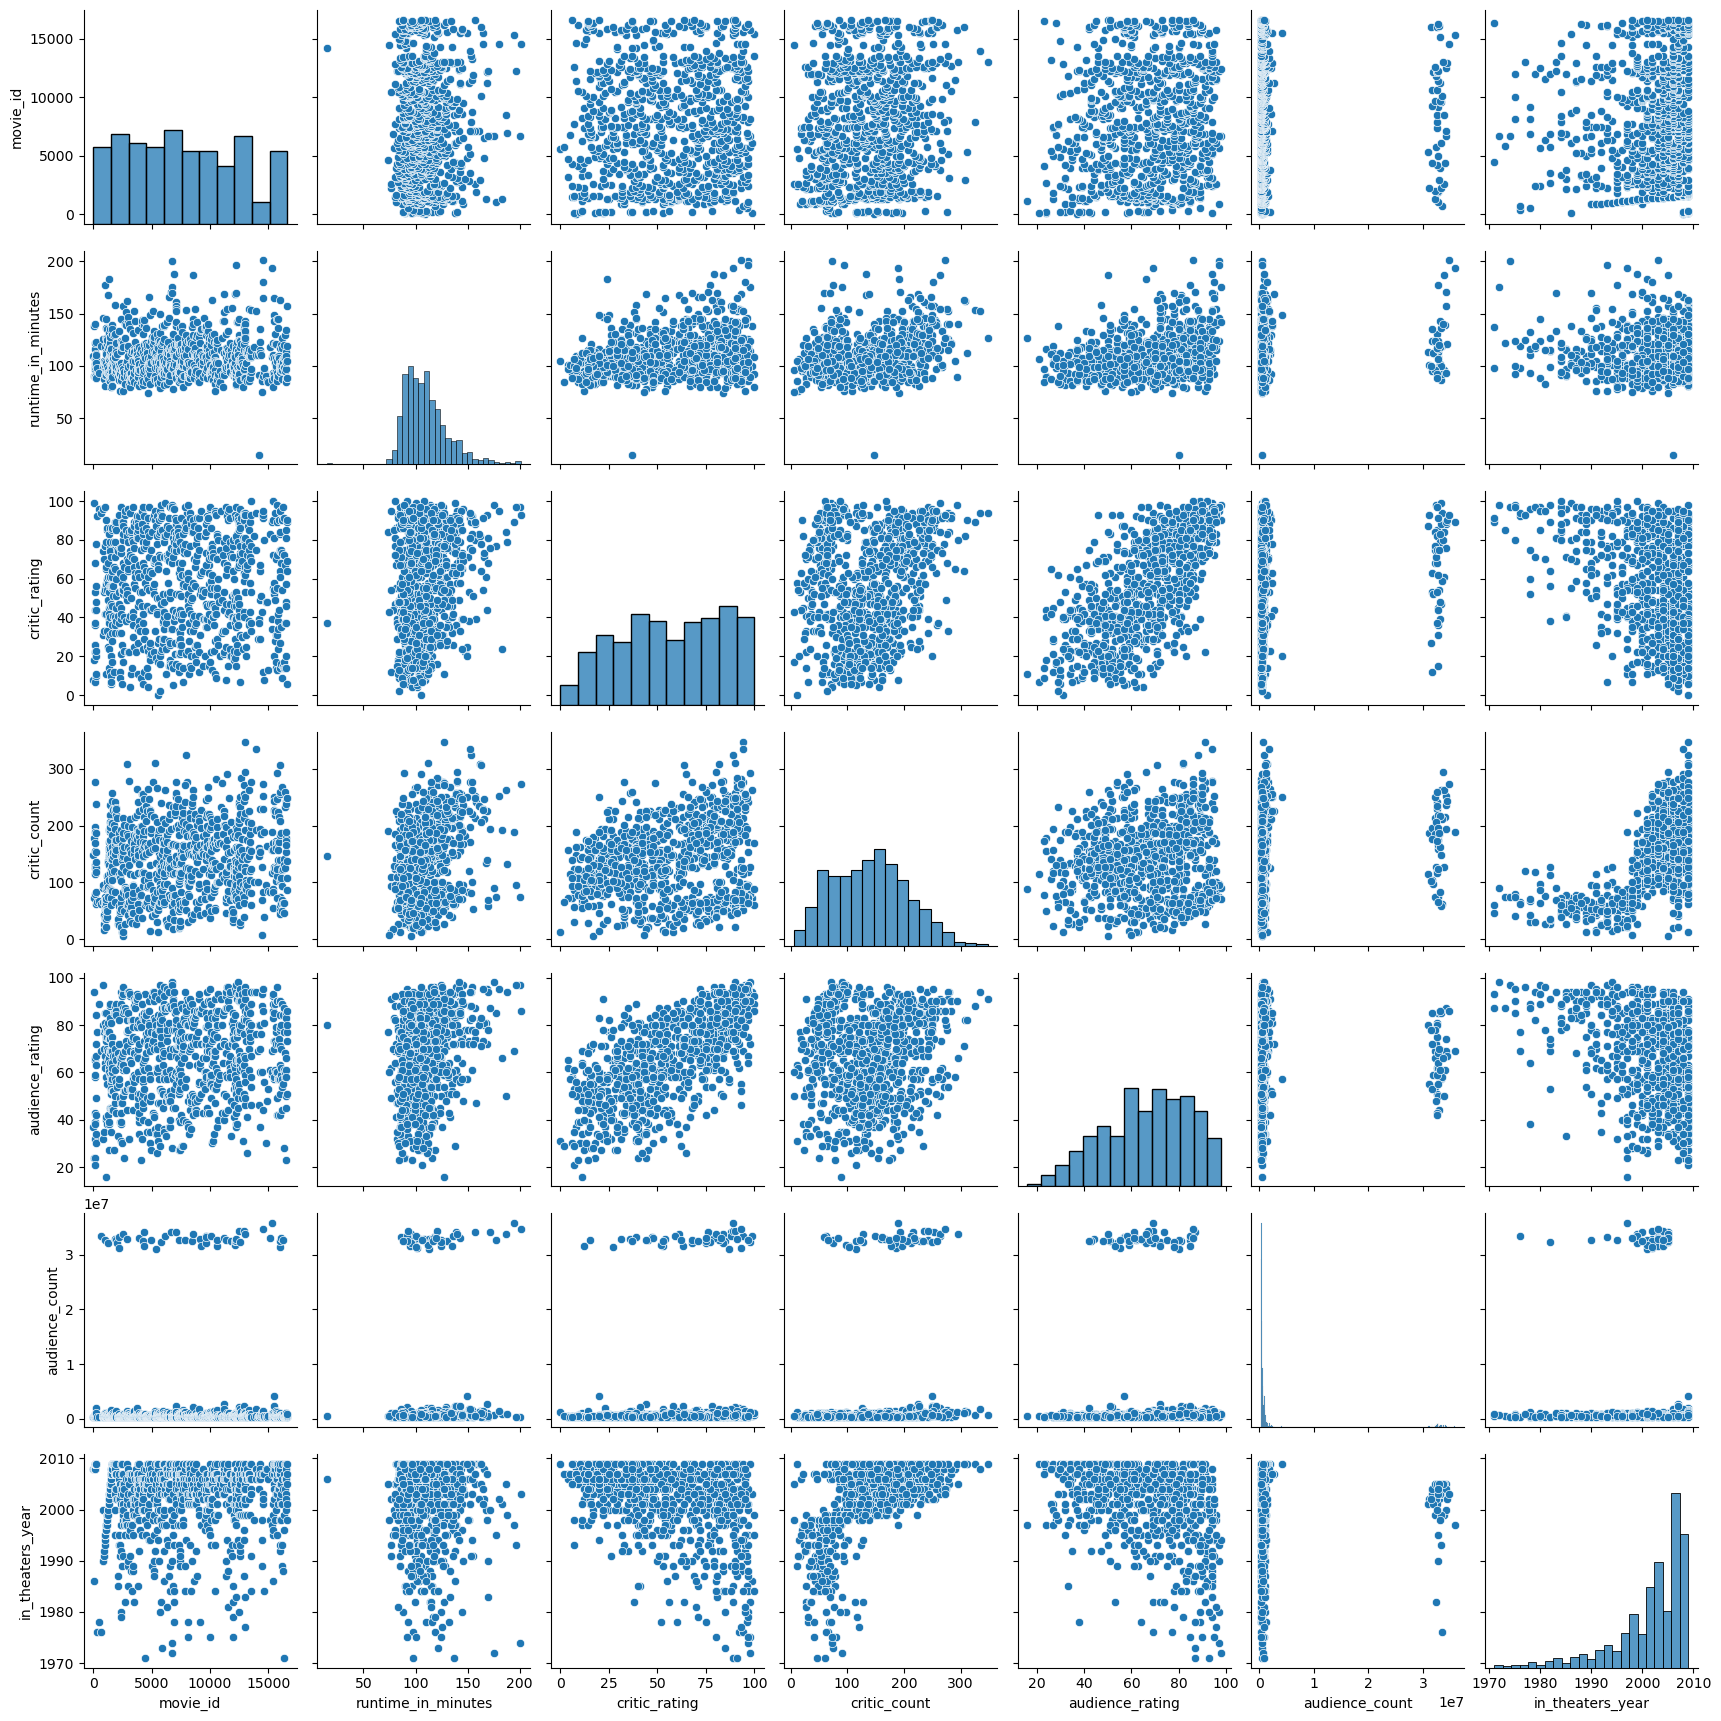

In [22]:
sns.pairplot(pop_movies)
plt.show()

Takeaway 1

In general, critic ratings and audience rating show a positive correlation.


Takeaway 2

Both critic rating and audience rating have somehow left-skewed distribution, meaning that people usually tend to give higher ratings.


Takeaway 3

Both critic ratings and audience ratings do not have obvious linear relationships with the length of the movie (runtime_in_minutes).


#### 2.6

Insight 1

In [23]:
print(f'Total number of critic rating: {sum(pop_movies.critic_count)} \nTotal number of audience rating: {sum(pop_movies.audience_count)}')

Total number of critic rating: 117794 
Total number of audience rating: 2103606007.0


There are far more audience ratings than critic ratings

Insight 2

Text(0, 0.5, 'Mean Critic Rating count')

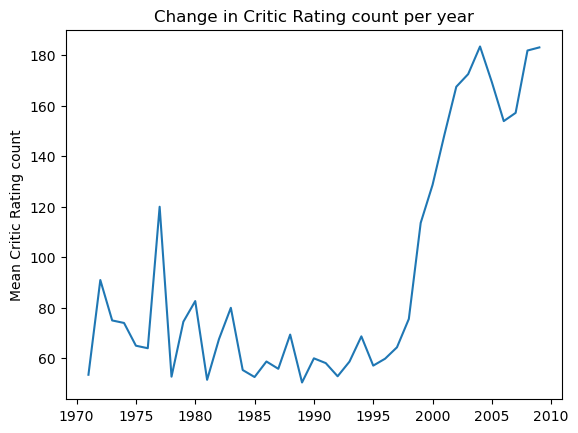

In [24]:
mean_cnt = pop_movies[['in_theaters_year', 'critic_count']].groupby('in_theaters_year').mean().reset_index()
plt.plot(mean_cnt.in_theaters_year, mean_cnt.critic_count)
plt.title('Change in Critic Rating count per year')
plt.ylabel('Year')
plt.ylabel('Mean Critic Rating count')


There was a major inrease in critic ratings count since 2000

Insight 3

In [25]:
pop_movies.isna().sum()

movie_id              0
movie_title           0
movie_info            0
rating                0
genre                 0
directors             3
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
critic_rating         0
critic_count          0
audience_rating       0
audience_count        0
in_theaters_year      0
dtype: int64

Only the column directors contain 3 NAs, may consider drop those rows in later process.

### 3. Feature Engineering

In [3]:
# Re-read the data because we have filtered by before 2010 in previous parts
movies = pd.read_csv('movies.csv')
movies['in_theaters_date'] = pd.to_datetime(movies['in_theaters_date'])
movies.loc[movies['in_theaters_date'] > pd.to_datetime('2019-12-12'), 'in_theaters_date'] -= pd.DateOffset(years=100)

#### 3.1 Train-Test split

In [4]:
# Split based on 2010
train_set = movies[movies.in_theaters_date < pd.to_datetime('2010-01-01')]
test_set = movies[movies.in_theaters_date > pd.to_datetime('2010-01-01')]

#### 3.2

Per our purpose to predict critic_rating before the first critic/audience rating posted, we should exclude critic_rating, critic_count, audience_rating, and audience_count for features.

In [5]:
# Include critic_rating here for X and y split later
train_set = train_set.drop(columns = ['critic_count', 'audience_rating', 'audience_count'])
test_set = test_set.drop(columns = ['critic_count', 'audience_rating', 'audience_count'])

In [6]:
train_set.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NaN,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,100
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,89
5,6,"10,000 B.C.",A young outcast from a primitive tribe is forc...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109.0,8
6,7,The 39 Steps,A man in London tries to help a counterespiona...,NaN,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,1935-08-01,2035-06-06,87.0,96


#### 3.3 Update Training data

In [7]:
def process_genre_column(original_df, target_df, column_name = "genre"):
    """
    Creates dummy variables for genres based on the original DataFrame's genres 
    and merges them with the target DataFrame efficiently.

    Parameters:
    original_df (pd.DataFrame): The original DataFrame to extract unique genres.
    target_df (pd.DataFrame): The DataFrame (train/test) to process and merge with dummies.
    column_name (str): The name of the column containing genres.

    Returns:
    pd.DataFrame: The target DataFrame with genre dummy variables merged.
    """
    # Extract unique genres from the original DataFrame
    original_genres = set(
        g.strip()
        for genre_list in original_df[column_name].fillna("").str.split(',')
        for g in genre_list
    )

    # Create a copy of the target DataFrame
    target_df = target_df.copy()
    target_df[column_name] = target_df[column_name].fillna("")

    # Create a dictionary to hold dummy columns
    dummy_columns = {
        f'genre_{genre}': target_df[column_name].str.contains(genre).astype(int)
        for genre in original_genres
    }

    # Add all dummy columns to the DataFrame in one step
    dummy_df = pd.DataFrame(dummy_columns, index=target_df.index)
    target_df = pd.concat([target_df, dummy_df], axis=1)

    # Drop the original genre column
    return target_df.drop(columns=[column_name, 'genre_'])

In [8]:
# Process training X
train_X = process_genre_column(movies, train_set)

In [9]:
# Select columns from train_X
train_X = train_X[['runtime_in_minutes', 'movie_title', 'rating'] + train_X.filter(like ='genre').columns.tolist()]

# Add a new column 'kid_friendly' to train_X based on the 'rating' column
train_X['kid_friendly'] = np.where(train_X['rating'].isin(['G', 'PG']), 1, 0)


In [10]:
train_X.shape

(9764, 25)

In [11]:
train_X.head()

,runtime_in_minutes,movie_title,rating,genre_Gay & Lesbian,genre_Art House & International,genre_Sports & Fitness,genre_Special Interest,genre_Musical & Performing Arts,genre_Television,genre_Comedy,...,genre_Western,genre_Action & Adventure,genre_Kids & Family,genre_Cult Movies,genre_Romance,genre_Drama,genre_Science Fiction & Fantasy,genre_Documentary,genre_Animation,kid_friendly
2,118.0,10,R,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,95.0,12 Angry Men (Twelve Angry Men),NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,127.0,"20,000 Leagues Under The Sea",G,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
5,109.0,"10,000 B.C.",PG-13,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6,87.0,The 39 Steps,NaN,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
# Create train_y
train_y = train_set.critic_rating

#### 3.4 Other Feature Fngineering

In [13]:
train_set.head()

,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating
2,3,10,Blake Edwards' 10 stars Dudley Moore as George...,R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118.0,68
3,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",NaN,"Classics, Drama",Sidney Lumet,1957-04-13,2001-03-06,95.0,100
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,1954-01-01,2003-05-20,127.0,89
5,6,"10,000 B.C.",A young outcast from a primitive tribe is forc...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109.0,8
6,7,The 39 Steps,A man in London tries to help a counterespiona...,NaN,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,1935-08-01,2035-06-06,87.0,96


Additional Feature 1: Change movie_title to its length

Critics can have their own taste on movie title, when considering first impression

In [14]:
# Replace movie title by its length because it is not numeric
train_X['movie_title'] = train_X['movie_title'].apply(lambda x: len(x))

Additional Feature 2: Map Ratings

As found in EDA session, critic rating shows obvious difference among different move ratings, implying changing criterias

In [15]:
# As noticed in EDA, the rating of movie can potentially influence critic's criteria
rating_map = {'R': 4, 'PG-13': 3, 'PG': 2, 'G': 1, np.nan: 0}
train_X['rating_mapped'] = train_set['rating'].map(lambda x: rating_map.get(x, 0)).drop(columns = ['rating'])
train_X.drop(columns = 'rating', inplace = True)

Additional Feature 3: Directors

Critics may have preference to certain directors, especially those famous or very achieved in their fields

In [16]:
def process_directors_column(original_df, target_df, column_name="directors", top_n=100):
    """
    Creates dummy variables for directors based on the top N directors in the original DataFrame
    ranked by occurrence, and merges them with the target DataFrame efficiently.

    Parameters:
    original_df (pd.DataFrame): The original DataFrame to extract and rank directors.
    target_df (pd.DataFrame): The DataFrame (train/test) to process and merge with dummies.
    column_name (str): The name of the column containing directors.
    top_n (int): Number of top directors to consider for creating dummy variables.

    Returns:
    pd.DataFrame: The target DataFrame with director dummy variables merged.
    """
    # Rank directors by occurrence in the original DataFrame
    director_counts = (
        original_df[column_name]
        .fillna("")                        # Handle missing values
        .str.split("&")                   # Split directors by delimiter
        .explode()                        # Flatten the list of directors
        .str.strip()                      # Remove extra whitespace
        .value_counts()                   # Count occurrences of each director
    )
    # Select the top N directors
    top_directors = director_counts.head(top_n).index

    # Create a copy of the target DataFrame
    target_df = target_df.copy()
    target_df[column_name] = target_df[column_name].fillna("")

    # Create a dictionary to hold dummy columns
    dummy_columns = {
        f'director_{director}': target_df[column_name].str.contains(director).astype(int)
        for director in top_directors
    }

    # Add all dummy columns to the DataFrame in one step
    dummy_df = pd.DataFrame(dummy_columns, index=target_df.index)
    target_df = pd.concat([target_df, dummy_df], axis=1)

    # Drop the original directors column
    return target_df.drop(columns=[column_name, 'director_'])

In [17]:
train_X['directors'] = train_set['directors']
train_X = process_directors_column(movies, train_X)

### 4. Modeling

In [18]:
# First apply same feature engineering to test_X
test_X = test_set[['movie_title', 'runtime_in_minutes', 'genre']].copy()
# Classify ratings in the updated training set
test_X['kid_friendly'] = np.where(test_set['rating'].isin(['G', 'PG']), 1, 0)
test_X = process_genre_column(movies, test_X)
test_X['rating_mapped'] = test_set['rating'].map(lambda x: rating_map.get(x, 0))
test_X['directors'] = test_set['directors']
test_X = process_directors_column(movies, test_X)
test_X['movie_title'] = test_X['movie_title'].apply(lambda x: len(x))


In [19]:
# Split test_y from test set
test_y = test_set.critic_rating

In [20]:
# Check if there are still NAs existing
print(test_X.isna().sum(), train_X.isna().sum())

movie_title                          0
runtime_in_minutes                 123
kid_friendly                         0
genre_Gay & Lesbian                  0
genre_Art House & International      0
                                  ... 
director_M. Night Shyamalan          0
director_Zhang Yimou                 0
director_Mervyn LeRoy                0
director_Peter Jackson               0
director_Michael Bay                 0
Length: 124, dtype: int64 runtime_in_minutes                 2
movie_title                        0
genre_Gay & Lesbian                0
genre_Art House & International    0
genre_Sports & Fitness             0
                                  ..
director_M. Night Shyamalan        0
director_Zhang Yimou               0
director_Mervyn LeRoy              0
director_Peter Jackson             0
director_Michael Bay               0
Length: 124, dtype: int64


There are still 123 NAs in Test_X and 2 NAs in Train_X, we want to fill them with medians.

In [21]:
test_X['runtime_in_minutes'] = test_X['runtime_in_minutes'].fillna(test_X['runtime_in_minutes'].median())
train_X['runtime_in_minutes'] = train_X['runtime_in_minutes'].fillna(train_X['runtime_in_minutes'].median())

In [22]:
# Check if NA still exists
print(test_X.isna().sum(), train_X.isna().sum())

movie_title                        0
runtime_in_minutes                 0
kid_friendly                       0
genre_Gay & Lesbian                0
genre_Art House & International    0
                                  ..
director_M. Night Shyamalan        0
director_Zhang Yimou               0
director_Mervyn LeRoy              0
director_Peter Jackson             0
director_Michael Bay               0
Length: 124, dtype: int64 runtime_in_minutes                 0
movie_title                        0
genre_Gay & Lesbian                0
genre_Art House & International    0
genre_Sports & Fitness             0
                                  ..
director_M. Night Shyamalan        0
director_Zhang Yimou               0
director_Mervyn LeRoy              0
director_Peter Jackson             0
director_Michael Bay               0
Length: 124, dtype: int64


#### Model 1: Use only runtime_in_minutes

In [23]:
# Assign training and testing set for Model 1
train_X_m1 = sm.add_constant(train_X['runtime_in_minutes'])
train_y_m1 = train_y
test_X_m1 = sm.add_constant(test_X['runtime_in_minutes'])
test_y_m1 = test_y

In [24]:
m1 = sm.OLS(train_y_m1, train_X_m1).fit()

#### Model 2: Use runtime_in_minutes and kid_friendly

In [25]:
# Assign training and testing set for Model 2
train_X_m2 = sm.add_constant(train_X[['runtime_in_minutes','kid_friendly']])
train_y_m2 = train_y
test_X_m2 = sm.add_constant(test_X[['runtime_in_minutes','kid_friendly']])
test_y_m2 = test_y

In [26]:
m2 = sm.OLS(train_y_m2, train_X_m2).fit()

#### Model 3: Use runtime_in_minutes, kid_friendly and the dummy columns for the genres

In [27]:
# Assign training and testing set for Model 3
train_X_m3 = sm.add_constant(train_X[['runtime_in_minutes', 'kid_friendly'] + train_X.filter(like ='genre').columns.tolist()])
train_y_m3 = train_y
test_X_m3 = sm.add_constant(test_X[['runtime_in_minutes', 'kid_friendly'] + test_X.filter(like ='genre').columns.tolist()])
test_y_m3 = test_y

In [28]:
m3 = sm.OLS(train_y_m3, train_X_m3).fit()

#### Testing Models

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the scoring function
def score_model(X_test, y_test, model):
    """
    Function to calculate R², MAE, and RMSE for model predictions.
    
    Parameters:
    X_test (array-like): Features from the test set.
    y_test (array-like): True values from the test set.
    model: The trained model (must have a `predict` method).
    
    Returns:
    dict: A dictionary containing the R², MAE, and RMSE scores.
    """
    # Predict y values using the model
    y_pred = model.predict(X_test)
    
    # Calculate R²
    r2 = r2_score(y_test, y_pred)
    
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return print(f'R²: {r2}, MAE: {mae}, RMSE: {rmse}')

In [30]:
# Model 1
score_model(test_X_m1, test_y_m1, m1)

R²: 0.0014816971856711492, MAE: 24.367489418655015, RMSE: 28.31357796274344


In [31]:
# Model 2
score_model(test_X_m2, test_y_m2, m2)

R²: 0.0012123268679294918, MAE: 24.40505593225091, RMSE: 28.317396782672454


In [32]:
# Model 3
score_model(test_X_m3, test_y_m3, m3)

R²: 0.15151356045041542, MAE: 22.035134795495154, RMSE: 26.09992096583634


In [33]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critic_rating   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     95.71
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           1.69e-22
Time:                        15:09:29   Log-Likelihood:                -46575.
No. Observations:                9764   AIC:                         9.315e+04
Df Residuals:                    9762   BIC:                         9.317e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.0440      1.086     46.077      0.000      47.915      52.173
runtime_in_minutes     0.0986      0.010      9.783      0.000       0.079       0.118
==============================================================================
Omnibus:                     1336.756   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.592
Skew:                          -0.405   Prob(JB):                    9.25e-124
Kurtosis:                       2.142   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critic_rating   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     54.40
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           3.19e-24
Time:                        15:09:29   Log-Likelihood:                -46569.
No. Observations:                9764   AIC:                         9.314e+04
Df Residuals:                    9761   BIC:                         9.316e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 49.4550      1.098     45.054      0.000      47.303      51.607
runtime_in_minutes     0.0990      0.010      9.828      0.000       0.079       0.119
kid_friendly           2.5230      0.700      3.602      0.000       1.150       3.896
==============================================================================
Omnibus:                     1301.363   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              563.269
Skew:                          -0.407   Prob(JB):                    4.87e-123
Kurtosis:                       2.149   Cond. No.                         413.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
m3.pvalues[:3]

const                 9.240697e-248
runtime_in_minutes     1.328601e-15
kid_friendly           8.420103e-05
dtype: float64

In [36]:
p_values = m3.pvalues

# Display only p-values for dummy variables (e.g., columns that contain 'genre')
dummy_p_values = p_values.filter(like = "genre")  
print(dummy_p_values.describe())

count     2.100000e+01
mean      7.636790e-02
std       1.528702e-01
min      2.830234e-201
25%       2.567318e-13
50%       3.362947e-04
75%       7.022444e-02
max       5.926304e-01
dtype: float64


Insofar, model3 works best according to the loss metrics. For all three models, runtime_in_minutes shows statistical significance. kid_friendly shows statistical significance in m3 but not in m2. For dummy variables, the inclusion of genre does improve model performance, while the p-values shows that some genre may impact critic rating more than most of others.

#### Model 4: Use runtime_in_minutes, kid_friendly, the dummy columns for the genres, and rating_mapped

m4 includes rating_mapped on the basis of m3, which can be influential to the model because critics tend to have different criterias towards different movie classifications

In [37]:
# Include month as a feature
train_X_m4 = sm.add_constant(train_X[['runtime_in_minutes', 'kid_friendly', 'rating_mapped'] + train_X.filter(like ='genre').columns.tolist()])
train_y_m4 = train_y
test_X_m4 = sm.add_constant(test_X[['runtime_in_minutes', 'kid_friendly', 'rating_mapped'] + test_X.filter(like ='genre').columns.tolist()])
test_y_m4 = test_y

In [38]:
m4 = sm.OLS(train_y_m4, train_X_m4).fit()

In [39]:
score_model(test_X_m4, test_y_m4, m4)

R²: 0.17504025628332576, MAE: 21.54197505975215, RMSE: 25.735530055840528


#### Model 5: Use runtime_in_minutes, rating_mapped, dummies variable for genre, and directors

m5 includes "directors" and exclude "kid_friendly", because "rating_mapped" very likely contain the information in kid_friendly and hence could cause multicolinearity.

In [40]:
# Include director and exclude kid_friendly
train_X_m5 = sm.add_constant(train_X[['runtime_in_minutes', 'rating_mapped'] + train_X.filter(like ='genre').columns.tolist() + train_X.filter(like ='director').columns.tolist()])
train_y_m5 = train_y
test_X_m5 = sm.add_constant(test_X[['runtime_in_minutes', 'rating_mapped']  + test_X.filter(like ='genre').columns.tolist() + train_X.filter(like ='director').columns.tolist()])
test_y_m5 = test_y

In [41]:
m5 = sm.OLS(train_y_m5, train_X_m5).fit()

In [42]:
score_model(test_X_m5, test_y_m5, m5)

R²: 0.17662097011772082, MAE: 21.526298619310747, RMSE: 25.710862176903532


#### Model 6: Use runtime_in_minutes, movie_title, rating_mapped, and dummy variable for genre

This model replaced director with movie_title for two reasons:

1. Excluding director because a specific director may have preference towards certain movie title length, causing multicolinearity
2. Compared to director, movie title is a more salient feature to both audience and critics, potentially influencing their first impression

In [43]:
# Include movie_title as a feature
train_X_m6 = sm.add_constant(train_X[['runtime_in_minutes', 'rating_mapped', 'movie_title'] + train_X.filter(like ='genre').columns.tolist()])
train_y_m6 = train_y
test_X_m6 = sm.add_constant(test_X[['runtime_in_minutes', 'rating_mapped', 'movie_title']  + test_X.filter(like ='genre').columns.tolist()])
test_y_m6 = test_y

In [44]:
m6 = sm.OLS(train_y_m6, train_X_m6).fit()

In [45]:
score_model(test_X_m6, test_y_m6, m6)

R²: 0.17504611411578963, MAE: 21.542724138616308, RMSE: 25.735438684902608


Out of the six models above, model 5, which use runtime_in_minutes, rating_mapped, dummies variable for genre, and directors, performed the best, with the loss function set as: $$R²: 0.177 \newline MAE: 21.52 \newline RMSE: 25.71$$
Then, we want to explore the p-values of the features included in model 5.

In [46]:
m6.pvalues[:3]

const                 3.482005e-239
runtime_in_minutes     7.081765e-19
rating_mapped          1.632322e-34
dtype: float64

In [47]:
m6.pvalues[3:].describe()

count     2.200000e+01
mean      8.031676e-02
std       1.429481e-01
min      1.217191e-109
25%       4.012497e-11
50%       1.874299e-04
75%       1.435928e-01
max       5.892324e-01
dtype: float64

According to the p-values printed above, the three features: 'runtime_in_minutes', 'rating_mapped', 'movie_title' have shown statistical significance, while the dummy variable for genre worked similarly as it was in model_3, among which some genres are particularly influential to critic's rating.

### 5. Directions to improve

5.1. Improve Feature Engineering for Genre and Director Dummies:

    Current Issue: We created a large number of dummy variables for genres and directors, which increases dimensionality and may lead to overfitting or reduced model interpretability.

    Suggestion: Use dimensionality reduction techniques like Principal Component Analysis (PCA) or group similar genres and directors into broader categories to simplify the feature set.

5.2. Handle Multicollinearity and Feature Selection:

    Current Issue: Some features (e.g., rating_mapped, kid_friendly, and director dummies) may introduce multicollinearity. For instance, rating_mapped might already encode much of the information in kid_friendly.

    Suggestion: Use Variance Inflation Factor (VIF) analysis to identify multicollinear features and exclude redundant ones.  One can also try regularization techniques like Lasso regression to automate feature selection

5.3. Model Validation and Cross-Validation:

    Current Issue: The current approach appears to use only a train-test split, which might not fully evaluate model performance.

    Suggestion: Implement k-fold cross-validation to assess model performance more robustly.